In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('..')

from gym_minigrid_navigation.utils import show_video
from train_worker import gen_navigation_env, get_agent, run_episode, run_episodes

from rewards import get_reward_function
from utils import init_logger, switch_reproducibility_on, display_stats

init_logger('dqn')
init_logger('train_worker')
init_logger('environments')
init_logger('gym_minigrid_navigation.environments')

### config 

In [4]:
from pyhocon import ConfigFactory

config = ConfigFactory.parse_file('../conf/minigrid_dqn_navigation_mlp.hocon')
config['env']['video_path'] = './video/'

In [5]:
switch_reproducibility_on(config['seed'])

### environment 

In [15]:
env = gen_navigation_env(config['env'])

### agent 

In [7]:
agent = get_agent(config)

2021-03-26 09:53:19,301 INFO    dqn                    : Running on device: cuda:0


### trainings 

In [8]:
scores, steps = run_episodes(env, agent, n_episodes=config['training.n_episodes'], verbose=config['training.verbose'])

2021-03-26 09:54:41,738 INFO    train_worker           : Episode: 100. scores: -11.06, steps: 119.38, achieved: 0.80
2021-03-26 09:55:35,517 INFO    train_worker           : Episode: 200. scores: -6.72, steps: 76.76, achieved: 0.87
2021-03-26 09:55:59,379 INFO    train_worker           : Episode: 300. scores: -2.26, steps: 33.11, achieved: 0.96
2021-03-26 09:56:20,232 INFO    train_worker           : Episode: 400. scores: -1.78, steps: 28.43, achieved: 0.97
2021-03-26 09:56:38,126 INFO    train_worker           : Episode: 500. scores: -1.35, steps: 24.14, achieved: 0.97
2021-03-26 09:56:56,384 INFO    train_worker           : Episode: 600. scores: -1.42, steps: 24.60, achieved: 0.95
2021-03-26 09:57:15,796 INFO    train_worker           : Episode: 700. scores: -1.56, steps: 26.11, achieved: 0.96
2021-03-26 09:57:25,597 INFO    train_worker           : Episode: 800. scores: -0.21, steps: 13.15, achieved: 1.00
2021-03-26 09:57:31,351 INFO    train_worker           : Episode: 900. scores:

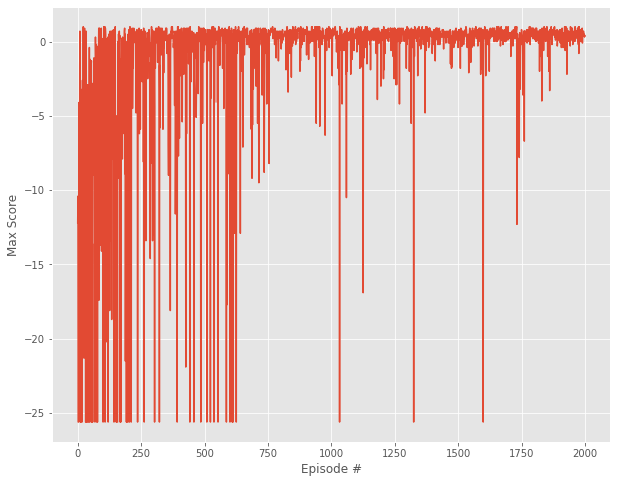

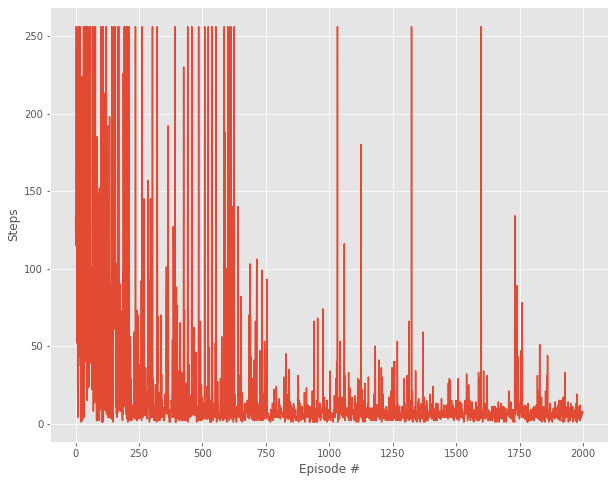

In [9]:
display_stats(scores, steps)

### validation 

In [16]:
from train_worker import gen_navigation_env, get_agent, run_episode, run_episodes

scores, steps = run_episodes(env, agent, train_mode=False, n_episodes=100, verbose=config['training.verbose'])

2021-03-26 10:00:11,568 INFO    train_worker           : Episode: 100. scores: -2.85, steps: 38.10, achieved: 0.87


### visualisation 

In [11]:
import environments

env = gen_navigation_env(config['env'], verbose = True)
env = environments.visualisation_wrapper(env, config['env.video_path'])

print(run_episode(env, agent, train_mode=False))

2021-03-26 09:58:54,684 INFO    gym_minigrid_navigation.environments   : Random goal: [1 5]


(0.6, 5, True)


In [12]:
show_video()